### Unity communication examples (use on TestScene_6)

Initialize class for communication with Unity (needed only once).
Default communication address is 127.0.0.1 and port is 8080, use `url` and `port` parameters to change them.

In [13]:
from graph_export.scriptcheck import UnityCommunication

comm = UnityCommunication()

In [7]:
import json

with open('scene_6_change.json', 'r') as f:
    graph_changes = json.load(f)

In [10]:
new_graph = graph_changes['graph_state_list'][0]

#### Apply changes to scene in unity (should be TestScene_6)

In [18]:
success, message = comm.expand_scene(new_graph)

Check if successful; `message` is a dictionary of errors.
- Note that changes that did not fail, are applied to the scene.
- Success is `True` precisely when all lists in `message` dictionary are empty.
- For a list of supported new objects see keys of the dictionary in resources/object_prefabs.json
- Algorithm tries to find an empty space on the destination object. If you try to put a lot of objects to an object, the program will fail (e.g., putting 10 object to a chair)

In [19]:
success

True

In [20]:
message

{'invalid_ids': [],
 'missing_destinations': [],
 'missing_prefabs': [],
 'unplaced': []}

#### Get images from cameras

Count cameras:

In [23]:
success, value = comm.camera_count()
print(value)

72


Get image from camera 38

In [24]:
success, imgs = comm.camera_image(38) # for multiple cameras use a list, e.g., [38, 39, 44]

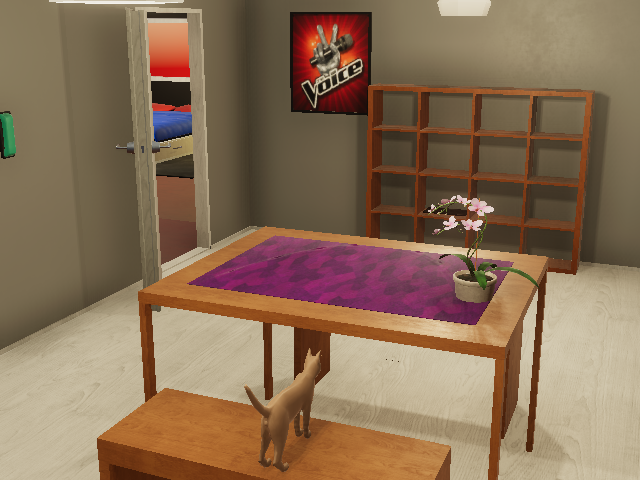

In [25]:
imgs[0]

You can get other "types" of images. Possible "modes" are: 'normal' (default), 'seg_inst', 'seg_class', 'depth', 'flow'


In [28]:
success, imgs = comm.camera_image(38, mode='seg_inst')

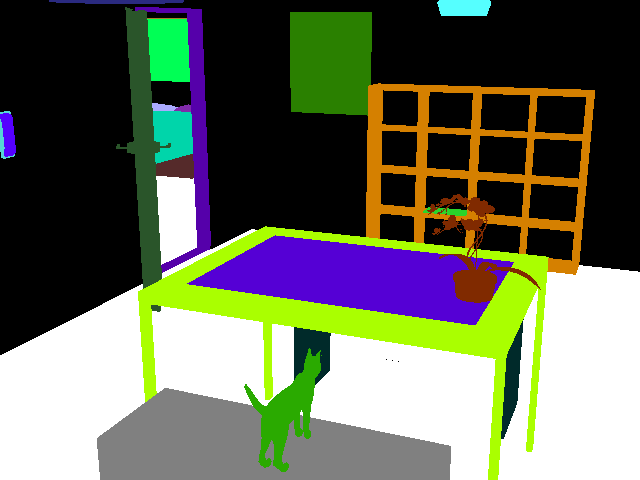

In [29]:
imgs[0]

#### Applying another change

Before applying a new change with `expand_scene`, use `comm.reset()` function. Note that this is quite slow operation since it reloads the scene and initializes it.